# Map de la course

In [1]:
#Importer la librairie Folium et en faire sortir une carte du monde
import folium
abud = folium.Map()

#Mettre dans une variable la carte du monde mais centrée sur l'Asie
#Ajouter le bouton de contrôle de zoom et une échelle de distance
abud = folium.Map(location=[24.466667, 54.366667], control_scale=True, zoom_control=True, zoom_start = 4)

#Ajouter l'outil qui permet de donner les coordonnées sur la carte
folium.LatLngPopup().add_to(abud)


#Insérer un marqueur rouge sur le Circuit
folium.Marker(
    [24.4718, 54.6050],
    popup='Circuit Yas Marina',
    icon=folium.Icon(icon='check-square', prefix="fa", color="red"),
).add_to(abud)


abud

Make this Notebook Trusted to load map: File -> Trust Notebook

In [2]:
#Mettre dans une variable la carte du monde mais centrée sur la baie d'Abu Dhabi
#Ajouter le bouton de contrôle de zoom et une échelle de distance

abud = folium.Map(location=[24.466667, 54.366667], control_scale=True, zoom_control=True, zoom_start = 11)

#Insérer un marqueur rouge sur le Circuit
folium.Marker(
    [24.4718, 54.6050],
    popup='Circuit Yas Marina',
    icon=folium.Icon(icon='check-square', prefix="fa", color="red"),
).add_to(abud)
abud

Make this Notebook Trusted to load map: File -> Trust Notebook

# Start with Team points graph

In [3]:
#import all the necessary libraries(pd for df, requests for api, json to load data, sns and plt for graph)
import pandas as pd
import requests
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
response = requests.get('https://ergast.com/api/f1/current/1/constructorStandings.json')
data = response.json()
data['MRData']['StandingsTable']['StandingsLists'][0]

{'season': '2021',
 'round': '1',
 'ConstructorStandings': [{'position': '1',
   'positionText': '1',
   'points': '41',
   'wins': '1',
   'Constructor': {'constructorId': 'mercedes',
    'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One',
    'name': 'Mercedes',
    'nationality': 'German'}},
  {'position': '2',
   'positionText': '2',
   'points': '28',
   'wins': '0',
   'Constructor': {'constructorId': 'red_bull',
    'url': 'http://en.wikipedia.org/wiki/Red_Bull_Racing',
    'name': 'Red Bull',
    'nationality': 'Austrian'}},
  {'position': '3',
   'positionText': '3',
   'points': '18',
   'wins': '0',
   'Constructor': {'constructorId': 'mclaren',
    'url': 'http://en.wikipedia.org/wiki/McLaren',
    'name': 'McLaren',
    'nationality': 'British'}},
  {'position': '4',
   'positionText': '4',
   'points': '12',
   'wins': '0',
   'Constructor': {'constructorId': 'ferrari',
    'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
    'name': 'Ferrari',
    

In [5]:
#define a function to help us retrieve the data from ergast's api
def ergast_retrieve(category: str):
    url = f'https://ergast.com/api/f1{category}.json'
    response = requests.get(url).json()
    
    return response ['MRData']

In [6]:
# get points per team
rounds = 21
all_teamresults = pd.DataFrame()

for i in range (1, 21):
    race = ergast_retrieve(f'/current/{i}/constructorStandings')
    results = race['StandingsTable']['StandingsLists'][0]['ConstructorStandings'] 
    
    current_round = {'round' : i}
    
    for i in range (len(results)):
        team = results[i]['Constructor']['name']
        points = float(results[i]['points'])
        
        current_round[team] = points
        
    all_teamresults = all_teamresults.append(current_round, ignore_index = True)

In [7]:
#points already cumsumed
cumulative_teampoints = all_teamresults.set_index('round').reset_index()

In [8]:
#order by desc
cumulative_teampoints = cumulative_teampoints.sort_values(cumulative_teampoints.last_valid_index(), axis=1, ascending = False)

In [9]:
display(cumulative_teampoints)

,Mercedes,Red Bull,Ferrari,McLaren,Alpine F1 Team,AlphaTauri,Aston Martin,Williams,round,Alfa Romeo,Haas F1 Team
0,41.0,28.0,12.0,18.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
1,60.0,53.0,34.0,41.0,3.0,8.0,5.0,0.0,2.0,0.0,0.0
2,101.0,83.0,42.0,53.0,13.0,9.0,5.0,0.0,3.0,0.0,0.0
3,141.0,112.0,60.0,65.0,15.0,10.0,5.0,0.0,4.0,0.0,0.0
4,148.0,149.0,78.0,80.0,17.0,18.0,19.0,0.0,5.0,1.0,0.0
5,148.0,174.0,94.0,92.0,25.0,39.0,37.0,0.0,6.0,2.0,0.0
6,178.0,215.0,94.0,110.0,29.0,45.0,40.0,0.0,7.0,2.0,0.0
7,212.0,252.0,108.0,120.0,31.0,46.0,44.0,0.0,8.0,2.0,0.0
8,242.0,286.0,122.0,141.0,32.0,48.0,44.0,0.0,9.0,2.0,0.0
9,285.0,289.0,148.0,163.0,40.0,49.0,48.0,0.0,10.0,2.0,0.0


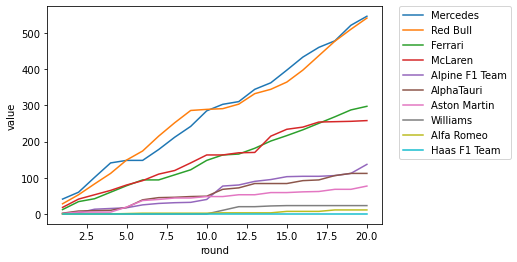

In [10]:
sns.lineplot(x = 'round', y = 'value', hue = 'variable', data = pd.melt(cumulative_teampoints, ['round']))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

# Continue with driver points graph

In [11]:
# get the points for all the drivers for each round
rounds = 21
all_raceresults = pd.DataFrame()

for i in range (1, 21):
    race = ergast_retrieve(f'/current/{i}/results')
    results = race ['RaceTable']['Races'][0]['Results']
    
    current_round = {'round' : i}
    
    for i in range (len(results)):
        driver = results[i]['Driver']['code']
        points = float(results[i]['points'])
        
        current_round[driver] = points
        
    all_raceresults = all_raceresults.append(current_round, ignore_index = True)

In [12]:
display(all_raceresults)

,ALO,BOT,GAS,GIO,HAM,LAT,LEC,MAZ,MSC,NOR,...,RAI,RIC,RUS,SAI,STR,TSU,VER,VET,round,KUB
0,0.0,16.0,0.0,0.0,25.0,0.0,8.0,0.0,0.0,12.0,...,0.0,6.0,0.0,4.0,1.0,2.0,18.0,0.0,1.0,NaN
1,1.0,0.0,6.0,0.0,19.0,0.0,12.0,0.0,0.0,15.0,...,0.0,8.0,0.0,10.0,4.0,0.0,25.0,0.0,2.0,NaN
2,4.0,16.0,1.0,0.0,25.0,0.0,8.0,0.0,0.0,10.0,...,0.0,2.0,0.0,0.0,0.0,0.0,18.0,0.0,3.0,NaN
3,0.0,15.0,1.0,0.0,25.0,0.0,12.0,0.0,0.0,4.0,...,0.0,8.0,0.0,6.0,0.0,0.0,19.0,0.0,4.0,NaN
4,0.0,0.0,8.0,1.0,7.0,0.0,0.0,0.0,0.0,15.0,...,0.0,0.0,0.0,18.0,4.0,0.0,25.0,10.0,5.0,NaN
5,8.0,0.0,15.0,0.0,0.0,0.0,12.0,0.0,0.0,10.0,...,1.0,2.0,0.0,4.0,0.0,6.0,0.0,18.0,6.0,NaN
6,4.0,12.0,6.0,0.0,18.0,0.0,0.0,0.0,0.0,10.0,...,0.0,8.0,0.0,0.0,1.0,0.0,26.0,2.0,7.0,NaN
7,2.0,15.0,0.0,0.0,19.0,0.0,6.0,0.0,0.0,10.0,...,0.0,0.0,0.0,8.0,4.0,1.0,25.0,0.0,8.0,NaN
8,1.0,18.0,2.0,0.0,12.0,0.0,4.0,0.0,0.0,15.0,...,0.0,6.0,0.0,10.0,0.0,0.0,26.0,0.0,9.0,NaN
9,6.0,16.0,0.0,0.0,27.0,0.0,18.0,0.0,0.0,12.0,...,0.0,10.0,0.0,8.0,4.0,1.0,3.0,0.0,10.0,NaN


In [13]:
#cumsum all the points of each round
cumulative_points = all_raceresults.set_index('round').cumsum(axis=0).reset_index()

In [14]:
#order columns by desc
cumulative_points = cumulative_points.sort_values(cumulative_points.last_valid_index(), axis=1, ascending = False)

In [15]:
cumulative_points

,VER,HAM,BOT,PER,NOR,LEC,SAI,RIC,GAS,ALO,...,STR,TSU,round,RUS,RAI,LAT,GIO,MSC,MAZ,KUB
0,18.0,25.0,16.0,10.0,12.0,8.0,4.0,6.0,0.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,43.0,44.0,16.0,10.0,27.0,20.0,14.0,14.0,6.0,1.0,...,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,61.0,69.0,32.0,22.0,37.0,28.0,14.0,16.0,7.0,5.0,...,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,80.0,94.0,47.0,32.0,41.0,40.0,20.0,24.0,8.0,5.0,...,5.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,105.0,101.0,47.0,44.0,56.0,40.0,38.0,24.0,16.0,5.0,...,9.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
5,105.0,101.0,47.0,69.0,66.0,52.0,42.0,26.0,31.0,13.0,...,9.0,8.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
6,131.0,119.0,59.0,84.0,76.0,52.0,42.0,34.0,37.0,17.0,...,10.0,8.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
7,156.0,138.0,74.0,96.0,86.0,58.0,50.0,34.0,37.0,19.0,...,14.0,9.0,8.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
8,182.0,150.0,92.0,104.0,101.0,62.0,60.0,40.0,39.0,20.0,...,14.0,9.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
9,185.0,177.0,108.0,104.0,113.0,80.0,68.0,50.0,39.0,26.0,...,18.0,10.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN


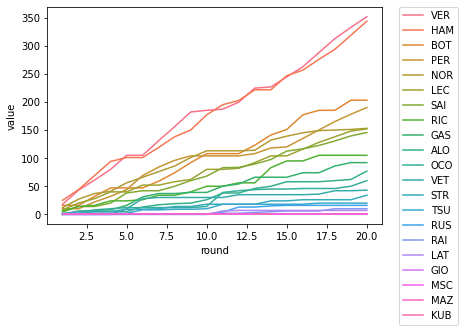

In [16]:
#plot the plot
sns.lineplot(x = 'round', y = 'value', hue = 'variable', data = pd.melt(cumulative_points, ['round']))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

## Sous question 1

### warning!!! only run if first time,
run by removing the # before the pip install in the next cell

In [17]:
!pip install fastf1

### We are going to create a new folder to store the data as it is quite big
#### or altenatively open from google drive: https://drive.google.com/file/d/1dR80gjubdkvS6vUIkHBMOEug2Hjx_WMu/view?usp=sharing , but we strongly suggest to run the code
This folder will be the 'cache'
alternatively go to open csv section

In [18]:
import pathlib
pathlib.Path('cache').mkdir(parents=True, exist_ok=True)

#### after the cache has been created to save the data, we have to enable it and get a csv for the data that we are going to use

In [19]:
# import the libaries that we are going to use (fastf1)
import fastf1 as ff1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

In [20]:
#enable the cache created previously
ff1.Cache.enable_cache('cache') 

In [21]:
# load data from ff1 for the 2020 abu dhabi gp race to predict this year's race
abu_race = ff1.get_session(2020, 'Abu Dhabi', 'R')

In [22]:
# get the data from each lap
lap_data = abu_race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['7', '99', '63', '55', '20', '10', '18', '33', '3', '23', '5', '31', '6', '4', '16', '11', '44', '26', '77', '51']


In [23]:
# remove first lap as it is a warmup lap, thus not with real lap speed
lap_data['RealLapNumber'] = lap_data['LapNumber'] - 1

In [24]:
# telemetry data from drivers
drivers = pd.unique(lap_data['Driver'])

telemetry = pd.DataFrame()

# Telemetry can only be accessed driver
for driver in drivers:
    driver_laps = lap_data.pick_driver(driver)
    
    # for the sectors, we need to collect data by distance (every lap)
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RealLapNumber']
    
        telemetry = telemetry.append(driver_telemetry)

### Open csv section
use the next two cells to produce a csv and/or open it with a csv
bypass the long load process

In [25]:
#with open('data.csv', 'w') as f:
    #telemetry.to_csv('data.csv', encoding='utf-8')

In [26]:
#telemetry = pd.read_csv('data.csv', encoding = 'utf-8')

In [27]:
# create mini sectors to seperate the race track into sections (inspired from Jasper's code on medium)
nb_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / nb_minisectors

minisectors = [0]

for i in range(0, (nb_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    

In [28]:
# give minisector for row in telemetry (from Jasper on medium)
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

In [29]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Minisector
2,2020-12-13 13:13:28.798,0 days 00:33:28.601000,,0.466667,0 days 00:00:00,11857,0,1,16,100,...,interpolation,0.000002,OnTrack,-2083,6084,-236,0.000000,VER,0,1
3,2020-12-13 13:13:28.871,0 days 00:33:28.674000,,0.466667,0 days 00:00:00.073000,11846,0,1,16,100,...,pos,0.000002,OnTrack,-2083,6084,-237,0.000000,VER,0,1
4,2020-12-13 13:13:28.945,0 days 00:33:28.748000,,0.466667,0 days 00:00:00.147000,11825,0,1,16,100,...,car,0.000000,OnTrack,-2082,6083,-237,0.000000,VER,0,1
5,2020-12-13 13:13:29.091,0 days 00:33:28.894000,,0.466667,0 days 00:00:00.293000,11448,0,1,16,50,...,pos,-0.000007,OnTrack,-2083,6084,-237,0.000000,VER,0,1
6,2020-12-13 13:13:29.185,0 days 00:33:28.988000,26,0.466667,0 days 00:00:00.387000,11072,0,1,17,0,...,car,0.000000,OnTrack,-2083,6084,-236,0.000000,VER,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2020-12-13 14:51:28.879,0 days 02:11:28.682000,18,4956.740000,0 days 00:01:42.445000,11700,214,5,100,0,...,car,0.994525,OnTrack,-3355,5960,-235,5467.598611,MAG,53,25
891,2020-12-13 14:51:28.928,0 days 02:11:28.731000,18,4956.340000,0 days 00:01:42.494000,11774,218,5,100,0,...,pos,0.995065,OnTrack,-3326,5964,-236,5470.565833,MAG,53,25
892,2020-12-13 14:51:29.119,0 days 02:11:28.922000,18,4955.940000,0 days 00:01:42.685000,11848,222,5,100,0,...,car,0.997214,OnTrack,-3208,5977,-236,5482.344167,MAG,53,25
893,2020-12-13 14:51:29.148,0 days 02:11:28.951000,18,4955.940000,0 days 00:01:42.714000,11708,226,5,100,0,...,pos,0.997545,OnTrack,-3190,5980,-237,5484.164722,MAG,53,25


In [30]:
# Calculate average speed per mini sector
average_speed = telemetry.groupby(['Minisector'])['Speed'].mean().reset_index()

In [31]:
average_speed.dtypes

Minisector      int64
Speed         float64
dtype: object

In [32]:
average_speed.rename(columns={'Speed':'avg_speed'},inplace = True)

In [33]:
#create value for speed tiers (less than 200kph is slow and over 280kph is fast)
conditions = [
    (average_speed['avg_speed'] <= 200),
    (average_speed['avg_speed'] > 200) & (average_speed['avg_speed'] <= 280),
    (average_speed['avg_speed'] > 280)
    ]
values = ['Slow', 'Medium', 'Fast']

# create new column in df for speed tiers
average_speed['tier'] = np.select(conditions, values)

In [34]:
average_speed

,Minisector,avg_speed,tier
0,1,217.745663,Medium
1,2,234.919743,Medium
2,3,173.090536,Slow
3,4,238.580222,Medium
4,5,254.453522,Medium
5,6,262.027566,Medium
6,7,124.786513,Slow
7,8,110.634770,Slow
8,9,241.114538,Medium
9,10,277.609983,Medium


In [35]:
# merge the average speed df with the telemetry df
telemetry = telemetry.merge(average_speed, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

In [36]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Status,X,Y,Z,Distance,Driver,Lap,Minisector,avg_speed,tier
0,2020-12-13 13:13:28.798,0 days 00:33:28.601000,,0.466667,0 days 00:00:00,11857,0,1,16,100,...,OnTrack,-2083,6084,-236,0.000000,VER,0,1,217.745663,Medium
10901,2020-12-13 14:46:40.880,0 days 02:06:40.683000,,312.127222,0 days 00:00:00,10577,227,5,100,0,...,OnTrack,-3049,5995,-237,0.000000,LEC,52,1,217.745663,Medium
10916,2020-12-13 14:48:27.245,0 days 02:08:27.048000,,517.207500,0 days 00:00:00,10672,231,6,100,0,...,OnTrack,-3051,5995,-237,0.000000,LEC,53,1,217.745663,Medium
10931,2020-12-13 13:13:28.798,0 days 00:33:28.601000,,0.466667,0 days 00:00:00,9726,0,1,35,100,...,OnTrack,-3041,5996,-237,0.000000,VET,0,1,217.745663,Medium
10932,2020-12-13 13:13:28.871,0 days 00:33:28.674000,,0.466667,0 days 00:00:00.073000,9725,0,1,35,100,...,OnTrack,-3041,5997,-237,0.000000,VET,0,1,217.745663,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960910,2020-12-13 14:18:23.564,0 days 01:38:23.367000,20,1145.082222,0 days 00:02:12.398000,10682,223,6,100,0,...,OnTrack,-3055,5995,-237,5546.221944,FIT,34,25,163.382024,Slow
949089,2020-12-13 14:19:19.847,0 days 01:39:19.650000,63,313.290833,0 days 00:02:02.555000,10609,228,6,100,0,...,OnTrack,-3044,5995,-237,5546.750556,VET,35,25,163.382024,Slow
945454,2020-12-13 13:56:52.951,0 days 01:16:52.754000,51,371.041944,0 days 00:02:03.159000,10711,225,5,100,0,...,OnTrack,-3062,5993,-237,5549.816944,LEC,22,25,163.382024,Slow
945455,2020-12-13 13:56:52.970,0 days 01:16:52.773000,51,371.041944,0 days 00:02:03.178000,10747,227,5,100,0,...,OnTrack,-3049,5994,-237,5551.015000,LEC,22,25,163.382024,Slow


In [37]:
# give int as matplotlib can only take float or int (also using 4,5,6 for the colours)
telemetry.loc[telemetry['tier'] == "Slow", 'tier_int'] = 6
telemetry.loc[telemetry['tier'] == "Medium", 'tier_int'] = 5
telemetry.loc[telemetry['tier'] == "Fast", 'tier_int'] = 4

In [38]:
#ploting time (using Jasper's method)
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
speed_tier = telemetry['tier_int'].to_numpy().astype(float)

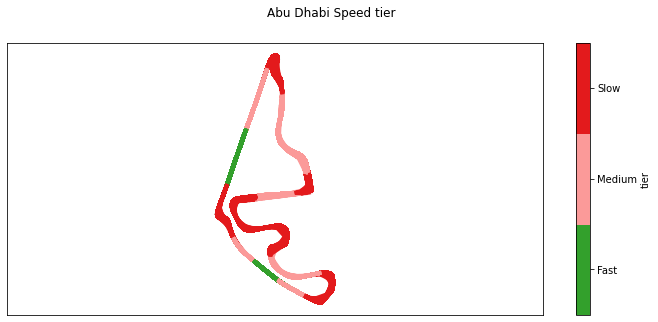

In [39]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(speed_tier)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [12, 5]
    
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
title = plt.suptitle(f"Abu Dhabi Speed tier")
    
cbar = plt.colorbar(mappable=lc_comp, label="tier", boundaries=np.arange(4,8))
cbar.set_ticks(np.arange(4.5, 8.5))
cbar.set_ticklabels(['Fast', 'Medium', 'Slow']) 

### Sous-question 2 - Quels types de pneus sont les plus performants afin de s'assurer les deux dernières victoires
warning!!! only run if first time,

Installer la librairie fastf1

#### After the cache has been created to save the data, we have to enable it and get a csv for the data that we are going to use

In [40]:
# import the libraries that we are going to use (fastf1)
import fastf1 as ff1

In [41]:
#enable the cache created previously
ff1.Cache.enable_cache('cache') 

In [42]:
# load data from ff1 for the 2020 abu dhabi gp race
abu_race = ff1.get_session(2020, 'Abu Dhabi', 'R')

In [43]:
# get the data from each lap
lap_data = abu_race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['7', '99', '63', '55', '20', '10', '18', '33', '3', '23', '5', '31', '6', '4', '16', '11', '44', '26', '77', '51']


In [44]:
#Visualiser le dataframe
display(lap_data)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:35:12.618000,33,NaT,1,1,0 days 00:00:06.256000,NaT,NaT,0 days 00:00:43.234000,0 days 00:00:40.388000,...,292.0,MEDIUM,4.0,False,0 days 00:33:28.601000,Red Bull,VER,1,False,2020-12-13 13:13:28.798
1,0 days 00:36:54.910000,33,0 days 00:01:42.292000,2,1,NaT,NaT,0 days 00:00:18.014000,0 days 00:00:43.728000,0 days 00:00:40.550000,...,286.0,MEDIUM,5.0,False,0 days 00:35:12.618000,Red Bull,VER,1,True,2020-12-13 13:15:12.815
2,0 days 00:38:37.117000,33,0 days 00:01:42.207000,3,1,NaT,NaT,0 days 00:00:17.980000,0 days 00:00:43.865000,0 days 00:00:40.362000,...,279.0,MEDIUM,6.0,False,0 days 00:36:54.910000,Red Bull,VER,1,True,2020-12-13 13:16:55.107
3,0 days 00:40:19.567000,33,0 days 00:01:42.450000,4,1,NaT,NaT,0 days 00:00:18.028000,0 days 00:00:43.938000,0 days 00:00:40.484000,...,277.0,MEDIUM,7.0,False,0 days 00:38:37.117000,Red Bull,VER,1,True,2020-12-13 13:18:37.314
4,0 days 00:42:02.219000,33,0 days 00:01:42.652000,5,1,NaT,NaT,0 days 00:00:18.009000,0 days 00:00:44.044000,0 days 00:00:40.599000,...,278.0,MEDIUM,8.0,False,0 days 00:40:19.567000,Red Bull,VER,1,True,2020-12-13 13:20:19.764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0 days 02:04:39.436000,20,0 days 00:01:41.999000,50,3,NaT,NaT,0 days 00:00:17.634000,0 days 00:00:43.678000,0 days 00:00:40.687000,...,298.0,MEDIUM,3.0,True,0 days 02:02:57.437000,Haas F1 Team,MAG,1,True,2020-12-13 14:42:57.634
1039,0 days 02:06:21.463000,20,0 days 00:01:42.027000,51,3,NaT,NaT,0 days 00:00:17.602000,0 days 00:00:43.761000,0 days 00:00:40.664000,...,299.0,MEDIUM,4.0,True,0 days 02:04:39.436000,Haas F1 Team,MAG,1,True,2020-12-13 14:44:39.633
1040,0 days 02:08:03.628000,20,0 days 00:01:42.165000,52,3,NaT,NaT,0 days 00:00:17.632000,0 days 00:00:43.568000,0 days 00:00:40.965000,...,301.0,MEDIUM,5.0,True,0 days 02:06:21.463000,Haas F1 Team,MAG,1,True,2020-12-13 14:46:21.660
1041,0 days 02:09:46.237000,20,0 days 00:01:42.609000,53,3,NaT,NaT,0 days 00:00:17.644000,0 days 00:00:43.893000,0 days 00:00:41.072000,...,301.0,MEDIUM,6.0,True,0 days 02:08:03.628000,Haas F1 Team,MAG,1,True,2020-12-13 14:48:03.825


In [45]:
# remove the warmup lap that was performed
lap_data['RealLapNumber'] = lap_data['LapNumber'] - 1

In [46]:
#Importer les librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Drop the warmup lap
df_lap_data = lap_data.drop(0)

#Créer 3 nouvelles colonnes afin de représenter le temps de chaque secteur en secondes
df_lap_data['Sector1Seconds'] = df_lap_data['Sector1Time'].dt.total_seconds()
df_lap_data['Sector2Seconds'] = df_lap_data['Sector2Time'].dt.total_seconds()
df_lap_data['Sector3Seconds'] = df_lap_data['Sector3Time'].dt.total_seconds()

#S'assurer que le type des nouvelles colonnes est float64
df_lap_data.dtypes

Time                  timedelta64[ns]
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                       int64
Stint                           int64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
Compound                       object
TyreLife                      float64
FreshTyre                      object
LapStartTime          timedelta64[ns]
Team                           object
Driver                         object
TrackStatus                    object
IsAccurate                     object
LapStartDate           datetime64[ns]
RealLapNumbe

In [47]:
#Créer un nouveau dataframe avec le "compound" des pneus ainsi que les 3 secteurs de la course
df_pneu = df_lap_data.groupby(['Compound'])[['Sector1Seconds', 'Sector2Seconds', 'Sector3Seconds']].mean()

#Inverser les colonnes et les lignes afin d'avoir un plot pertinent
df_pneu = df_pneu.transpose()

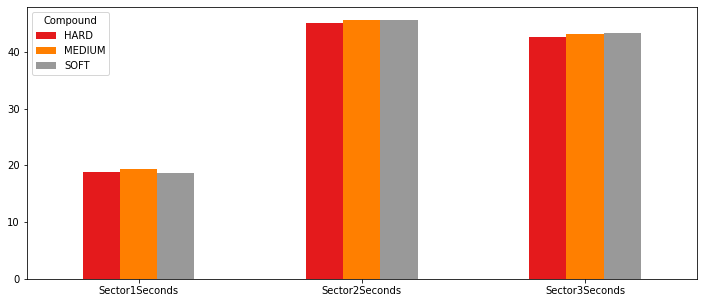

In [48]:
#Afficher les résultats dans un barplot où il est facile de voir quels types de pneu obtient les meilleurs temps
plot_pneu = df_pneu.plot(kind='bar', stacked=False, colormap = 'Set1')
plt.setp(plot_pneu.get_xticklabels(), rotation = 0)
plt.show()

## Monaco speed for comparison

core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.11]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['7', '99', '22', '63', '55', '10', '47', '14', '18', '33', '3', '5', '31', '9', '6', '4', '16', '11', '44', '77']


177.5637853971018

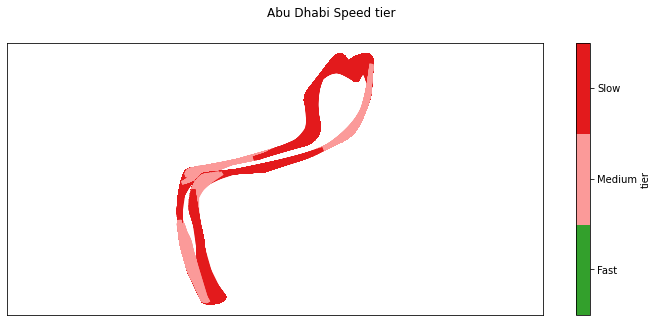

In [49]:
# import the libaries that we are going to use (fastf1)
import fastf1 as ff1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

#enable the cache created previously
ff1.Cache.enable_cache('cache') 

# load data from ff1 for the 2020 abu dhabi gp race to predict this year's race
monaco_race = ff1.get_session(2021, 'Monaco', 'R')

# get the data from each lap
lap_data = monaco_race.load_laps(with_telemetry=True)

# remove first lap as it is a warmup lap, thus not with real lap speed
lap_data['RealLapNumber'] = lap_data['LapNumber'] - 1

# telemetry data from drivers
drivers = pd.unique(lap_data['Driver'])

telemetry = pd.DataFrame()

# Telemetry can only be accessed driver
for driver in drivers:
    driver_laps = lap_data.pick_driver(driver)
    
    # for the sectors, we need to collect data by distance (every lap)
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RealLapNumber']
    
        telemetry = telemetry.append(driver_telemetry)

# Only keep distance for sector, speed for average speed, x and y for graphing
telemetry = telemetry[['Distance', 'Speed', 'X','Y']]

# create mini sectors to seperate the race track into sections (inspired from Jasper's code on medium)
nb_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / nb_minisectors

minisectors = [0]

for i in range(0, (nb_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    

# give minisector for row in telemetry (from Jasper on medium)
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

telemetry

# Calculate average speed per mini sector
average_speed = telemetry.groupby(['Minisector'])['Speed'].mean().reset_index()

average_speed.dtypes

average_speed.rename(columns={'Speed':'avg_speed'},inplace = True)

#create value for speed tiers (less than 200kph is slow and over 280kph is fast)
conditions = [
    (average_speed['avg_speed'] <= 200),
    (average_speed['avg_speed'] > 200) & (average_speed['avg_speed'] <= 280),
    (average_speed['avg_speed'] > 280)
    ]
values = ['Slow', 'Medium', 'Fast']

# create new column in df for speed tiers
average_speed['tier'] = np.select(conditions, values)

average_speed

# merge the average speed df with the telemetry df
telemetry = telemetry.merge(average_speed, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

telemetry

# give int as matplotlib can only take float or int (also using 4,5,6 for the colours)
telemetry.loc[telemetry['tier'] == "Slow", 'tier_int'] = 6
telemetry.loc[telemetry['tier'] == "Medium", 'tier_int'] = 5
telemetry.loc[telemetry['tier'] == "Fast", 'tier_int'] = 4

#ploting time (using Jasper's method)
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
speed_tier = telemetry['tier_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(speed_tier)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [12, 5]
    
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
title = plt.suptitle(f"Abu Dhabi Speed tier")
    
cbar = plt.colorbar(mappable=lc_comp, label="tier", boundaries=np.arange(4,8))
cbar.set_ticks(np.arange(4.5, 8.5))
cbar.set_ticklabels(['Fast', 'Medium', 'Slow']) 

average_speed['avg_speed'].mean()

## Monza speed for comparison

In [ ]:
# import the libaries that we are going to use (fastf1)
import fastf1 as ff1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm

#enable the cache created previously
ff1.Cache.enable_cache('cache') 

# load data from ff1 for the 2020 abu dhabi gp race to predict this year's race
monza_race = ff1.get_session(2021, 'Monza', 'R')

# get the data from each lap
lap_data = monza_race.load_laps(with_telemetry=True)

# remove first lap as it is a warmup lap, thus not with real lap speed
lap_data['RealLapNumber'] = lap_data['LapNumber'] - 1

# telemetry data from drivers
drivers = pd.unique(lap_data['Driver'])

telemetry = pd.DataFrame()

# Telemetry can only be accessed driver
for driver in drivers:
    driver_laps = lap_data.pick_driver(driver)
    
    # for the sectors, we need to collect data by distance (every lap)
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RealLapNumber']
    
        telemetry = telemetry.append(driver_telemetry)

# Only keep distance for sector, speed for average speed, x and y for graphing
telemetry = telemetry[['Distance', 'Speed', 'X','Y']]

# Open csv section
### use the next two cells to produce a csv and/or open it with a csv
### bypass the long load process

#with open('data.csv', 'w') as f:
    #telemetry.to_csv('data_monza.csv', encoding='utf-8')

#telemetry = pd.read_csv('data_monza.csv', encoding = 'utf-8')

# create mini sectors to seperate the race track into sections (inspired from Jasper's code on medium)
nb_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / nb_minisectors

minisectors = [0]

for i in range(0, (nb_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    

# give minisector for row in telemetry (from Jasper on medium)
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

telemetry

# Calculate average speed per mini sector
average_speed = telemetry.groupby(['Minisector'])['Speed'].mean().reset_index()

average_speed.dtypes

average_speed.rename(columns={'Speed':'avg_speed'},inplace = True)

#create value for speed tiers (less than 200kph is slow and over 280kph is fast)
conditions = [
    (average_speed['avg_speed'] <= 200),
    (average_speed['avg_speed'] > 200) & (average_speed['avg_speed'] <= 280),
    (average_speed['avg_speed'] > 280)
    ]
values = ['Slow', 'Medium', 'Fast']

# create new column in df for speed tiers
average_speed['tier'] = np.select(conditions, values)

average_speed

# merge the average speed df with the telemetry df
telemetry = telemetry.merge(average_speed, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

telemetry

# give int as matplotlib can only take float or int (also using 4,5,6 for the colours)
telemetry.loc[telemetry['tier'] == "Slow", 'tier_int'] = 6
telemetry.loc[telemetry['tier'] == "Medium", 'tier_int'] = 5
telemetry.loc[telemetry['tier'] == "Fast", 'tier_int'] = 4

#ploting time (using Jasper's method)
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
speed_tier = telemetry['tier_int'].to_numpy().astype(float)

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(speed_tier)
lc_comp.set_linewidth(4)

plt.rcParams['figure.figsize'] = [12, 5]
    
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
title = plt.suptitle(f"Abu Dhabi Speed tier")
    
cbar = plt.colorbar(mappable=lc_comp, label="tier", boundaries=np.arange(4,8))
cbar.set_ticks(np.arange(4.5, 8.5))
cbar.set_ticklabels(['Fast', 'Medium', 'Slow']) 

average_speed['avg_speed'].mean()